In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train_modified.csv',index_col='Id')
test_df = pd.read_csv('test_modified.csv',index_col='Id')
#Define target and ID columns:
target = ['SalePrice']
predictors = list(set(train_df.columns) - set(['log_SalePrice','SalePrice']))
#new_predictors = list(set(train_df.columns) - set(['log_SalePrice','SalePrice']))

#predictors = ['OverallSF']

In [3]:
train_df.index.name = 'Id'
test_df.index.name = 'Id'

In [4]:
test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
Id,,,,,,,,,,,,,,,,,,,,,
1461,20.0,80.0,11622,5,6.0,1961,1961,0.0,468.0,144.0,...,1,0,0,0,1,0,0,1,0,0
1462,20.0,81.0,14267,6,6.0,1958,1958,108.0,923.0,0.0,...,1,0,0,0,1,0,0,0,0,1
1463,60.0,74.0,13830,5,5.0,1997,1998,0.0,791.0,0.0,...,1,0,0,0,1,0,0,1,0,0
1464,60.0,78.0,9978,6,6.0,1998,1998,20.0,602.0,0.0,...,1,0,0,0,1,0,0,0,0,1
1465,120.0,43.0,5005,8,5.0,1992,1992,0.0,263.0,0.0,...,1,0,0,0,1,0,0,0,0,1


In [5]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(train_df)
print(df_pca)

[[-1.65447710e+03 -1.10385110e+02  3.30884002e+02 ...  7.70943012e-13
   3.58543787e-13  9.55337624e-14]
 [-5.05891185e+02  3.51980879e+01 -7.27241398e+02 ... -1.89004234e-13
  -2.39268280e-12 -3.87371090e-13]
 [ 1.14884943e+03 -1.41394633e+02  4.87949858e+02 ... -2.92503134e-12
  -1.43663408e-12  3.59621884e-13]
 ...
 [-9.91645460e+02 -1.23529856e+03  9.96303655e+02 ...  1.59015969e-13
  -1.63644737e-13  5.31965389e-13]
 [-4.33062978e+02  6.91196005e+02 -2.81474874e+02 ...  1.79102207e-13
   5.48308205e-13  2.94170689e-14]
 [-1.72255810e+02  1.27407876e+02 -6.76785090e+02 ... -4.35279204e-13
  -2.46432379e-13  1.34357819e-13]]


# LINEAR REG

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.feature_selection import f_regression, mutual_info_regression

## Instantaniate linear regression constructor
model_linear = LinearRegression()

## Define Predictors
X_train_lin = train_df[predictors].values
y_lin = train_df[target].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler

#sc_X_lin = StandardScaler()
#sc_y_lin = StandardScaler()

#X_train_lin = sc_X_lin.fit_transform(X_train_lin)
#y_lin = sc_y_lin.fit_transform(y_lin)


## Fit the model
results = model_linear.fit(X_train_lin,y_lin)

# The coefficients and intercept
#print("The Y-Intercept is",regr.intercept_, " with the slope value of ", regr.coef_)

## Run the prediction
y_hat_train_lin = model_linear.predict(X_train_lin)

## Run F tests
f_test, p_val = f_regression(X_train_lin, y_lin)
f_test /= np.max(f_test)


# Print residual errors
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_train_lin - y_lin)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat_train_lin - y_lin) ** 2))
print("(RMSE): %.5f" % np.sqrt(np.mean((y_hat_train_lin - y_lin) ** 2)))
print("R2-score: %.2f" % r2_score(y_hat_train_lin , y_lin))
print("Model Accuracy: %.2f" % model_linear.score(X_train_lin , y_lin))
print("")

VIF = 1/(1-np.sqrt(np.mean((y_hat_train_lin - y_lin) ** 2)))
print("Variance Inflation Factor (VIF): %.2f " %VIF)

print("")

SSResidual = np.sum((y_lin-y_hat_train_lin)**2)
print "Residual Sum of Squares :",SSResidual
# Sum of square difference of predicted Y values and True Y values

SSTotal = np.sum((y_lin-np.mean(y_lin))**2)
# Sum of square difference of mean of Y values and True Y values
print "Total Sum of Squares :",SSTotal

r_squared = 1 - (float(SSResidual))/SSTotal
print "r-squared :", r_squared

adjusted_r_squared = 1 - (1-r_squared)*(len(y_lin)-1)/(len(y_lin)-X_train_lin.shape[1]-1)
print "adjusted-r-squared :", adjusted_r_squared

rmse = np.sqrt(np.mean((y_lin-y_hat_train_lin)**2))
print "Root mean sq error (RMSE) :", rmse
#Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit.
print("")
#print("Ftest: %.5f " % float(f_test))
#print("Pval: %.5f " % float(p_val))
pvaldf = pd.DataFrame(data=[f_test,p_val,predictors])

Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
(RMSE): 0.09003
R2-score: 0.95
Model Accuracy: 0.95

Variance Inflation Factor (VIF): 1.10 

Residual Sum of Squares : 11.793047171461616
Total Sum of Squares : 231.76790143963063
r-squared : 0.9491169955019272
adjusted-r-squared : 0.9356661838780889
Root mean sq error (RMSE) : 0.09002881238483483



In [108]:
len(predictors)

304

In [109]:
pvaldf = pvaldf.T
pvaldf.columns = ['FScore','pVal','feature']

In [110]:
new_features = pvaldf[pvaldf['pVal'] <= 0.005]
pval_new_predictors = list(new_features.feature)
len(pval_new_predictors)

178

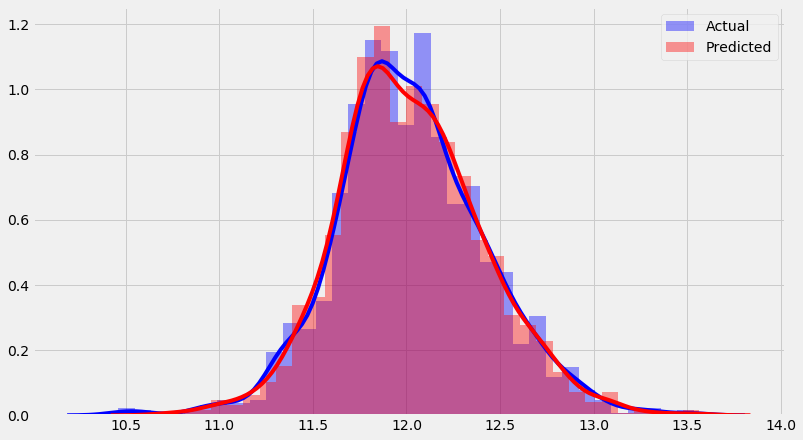

In [111]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
ax2 = sns.distplot(y_lin,color='b',hist=True,label='Actual')
sns.distplot(y_hat_train_lin,color='r',label='Predicted',hist=True,ax=ax2)
plt.legend()

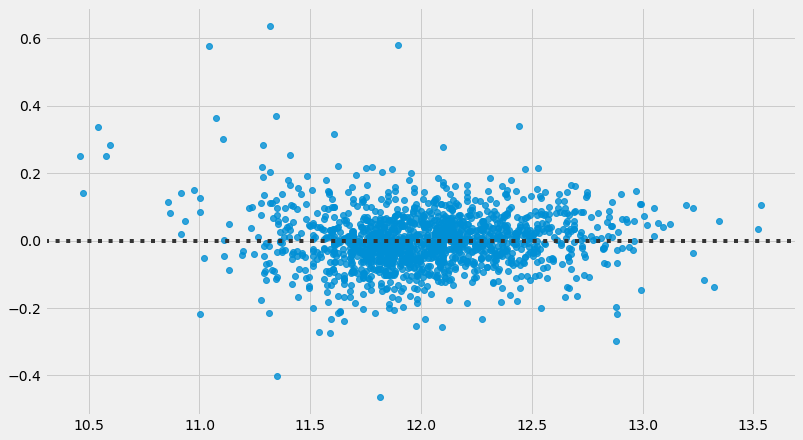

In [112]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.residplot(y_lin, y_hat_train_lin)

In [113]:
X_test_lin =test_df[predictors].values

In [114]:
# Feature Scaling
#X_test_lin = sc_X_lin.transform(X_test_lin)

In [115]:
y_hat_test_lin = model_linear.predict(X_test_lin)

In [116]:
#test_df['SalePrice'] = np.exp(sc_y_lin.inverse_transform(y_hat_test_lin))
test_df['SalePrice'] = np.exp(y_hat_test_lin)


In [117]:
test_df['SalePrice'].head()

Id
1461    120702.716797
1462    165766.969118
1463    184546.692722
1464    203586.440530
1465    194266.576164
Name: SalePrice, dtype: float64

In [118]:
submissions1 = test_df['SalePrice']
submissions1.columns = ['Id','SalePrice']

In [119]:
submissions1.to_csv("submission_linear.csv", header=True, index=True)

In [120]:
submissions1.head()

Id
1461    120702.716797
1462    165766.969118
1463    184546.692722
1464    203586.440530
1465    194266.576164
Name: SalePrice, dtype: float64

In [122]:
model_linear.score(X_test_lin ,y_hat_test_lin)

1.0

# LASSO

In [29]:
X_train_lasso = train_df[predictors].values
y_lasso = train_df[target].values

# Feature Scaling
#from sklearn.preprocessing import StandardScaler
##from sklearn.preprocessing import scale
#sc_X_lasso = StandardScaler()
#sc_y_lasso = StandardScaler()

#X_train_lasso = sc_X_lasso.fit_transform(X_train_lasso)
#y_lasso = sc_y_lasso.fit_transform(y_lasso)


In [70]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train_df[predictors], train_df[target],
                                   scoring="neg_mean_squared_error", cv = 10))
    #rmse= np.sqrt(cross_val_score(model, train_df[predictors], train_df[target], cv=10))

    return(rmse)

In [71]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train_lasso, y_lasso)
rmse_cv(model_lasso).mean()

0.10971605592227555

In [72]:
model_lasso.coef_.size

304

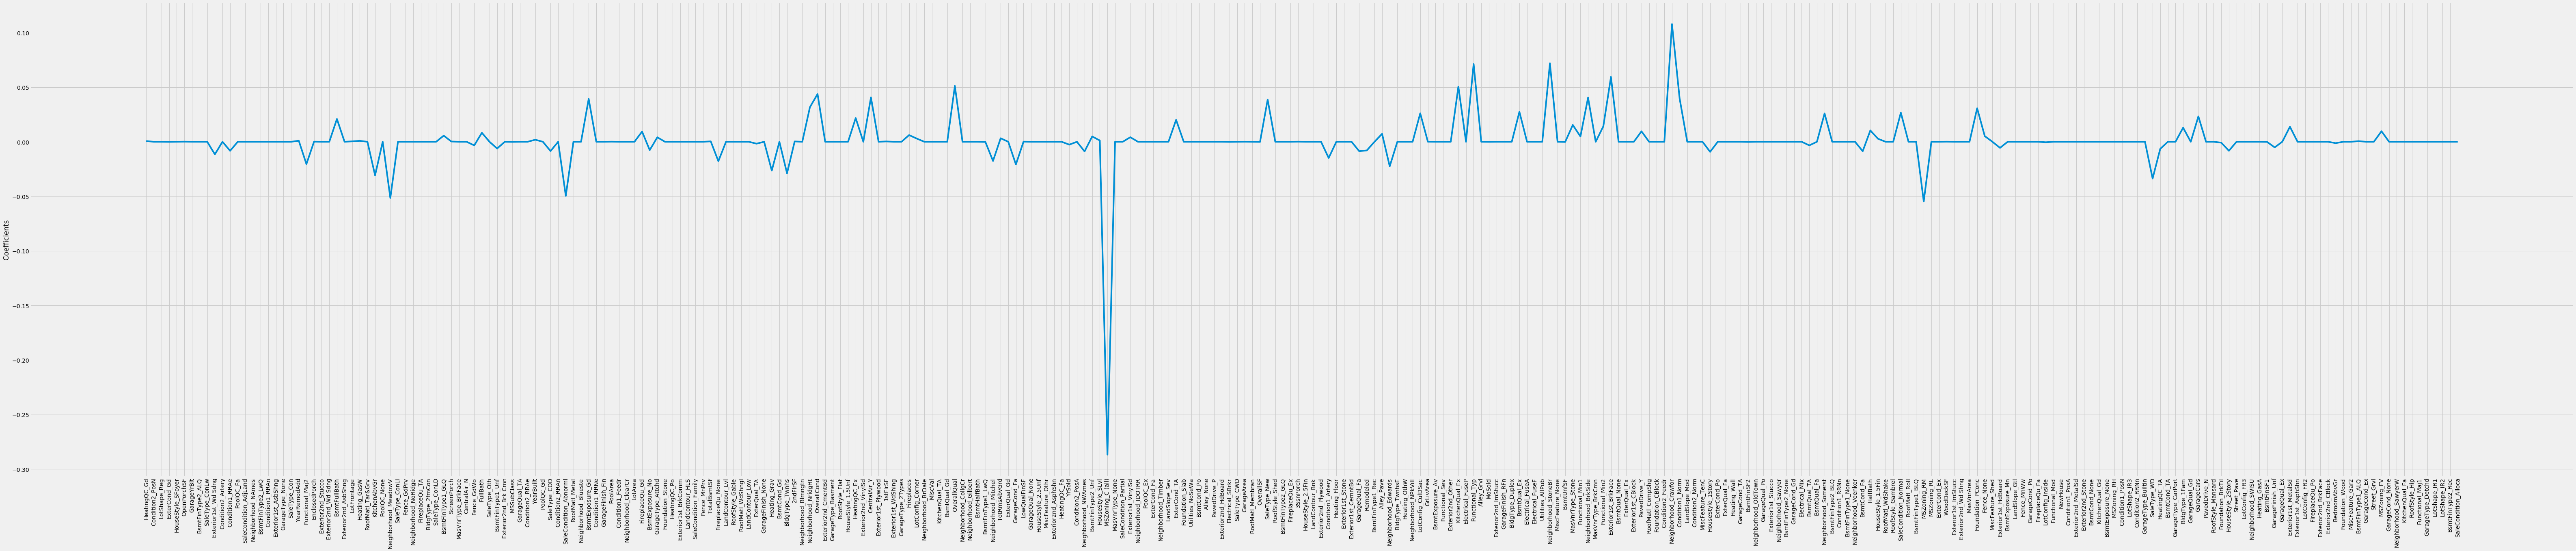

In [73]:
plt.figure(figsize=(100,20))
_ = plt.plot(range(len(predictors)), model_lasso.coef_)
_ = plt.xticks(range(len(predictors)), predictors, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show()

Text(0.5,1,'Coefficients in the Lasso Model')

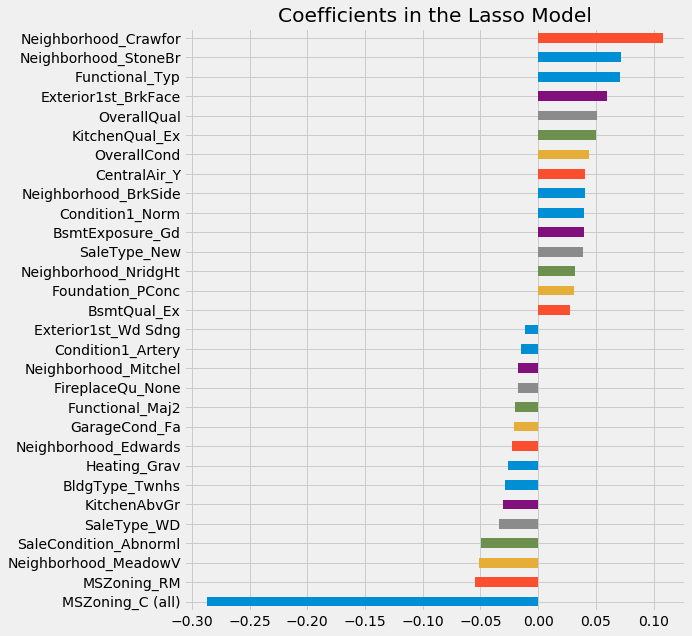

In [37]:
coef = pd.Series(model_lasso.coef_, index = predictors)
print("Lasso picked "+ str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(15),
 coef.sort_values().tail(15)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [38]:
X_test_lasso =test_df[predictors].values

In [39]:
# Feature Scaling
#X_test_lasso = sc_X_lasso.transform(X_test_lasso)

In [40]:
y_hat_test_lasso = model_lasso.predict(X_test_lasso)
y_hat_train_lasso = model_lasso.predict(X_train_lasso)
#y_hat_lasso

In [41]:
# Print residual errors
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_train_lasso - y_lasso)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat_train_lasso - y_lasso) ** 2))
print("(RMSE): %.5f" % np.sqrt(np.mean((y_hat_train_lasso - y_lasso) ** 2)))
print("R2-score: %.2f" % r2_score(y_hat_train_lasso , y_lasso))#
print("Model Accuracy: %.2f" % model_lasso.score(X_train_lasso , y_lasso))

Mean absolute error: 0.44
Residual sum of squares (MSE): 0.31
(RMSE): 0.55385
R2-score: 0.93
Model Accuracy: 0.94


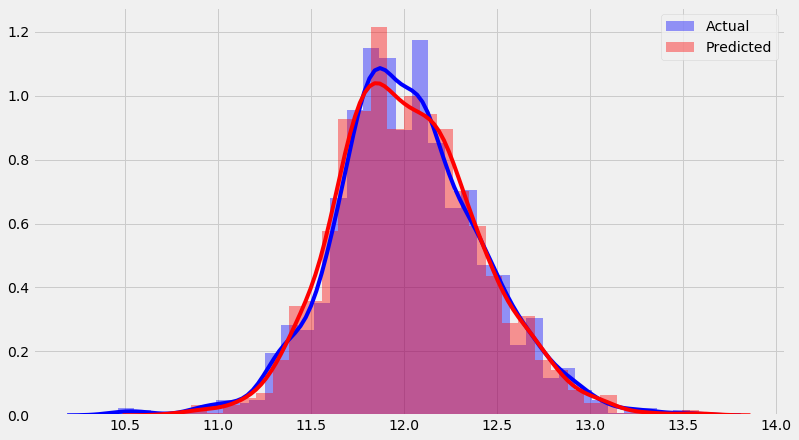

In [42]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
ax2 = sns.distplot(y_lasso,color='b',hist=True,label='Actual')
sns.distplot(y_hat_train_lasso,color='r',label='Predicted',hist=True,ax=ax2)
plt.legend()

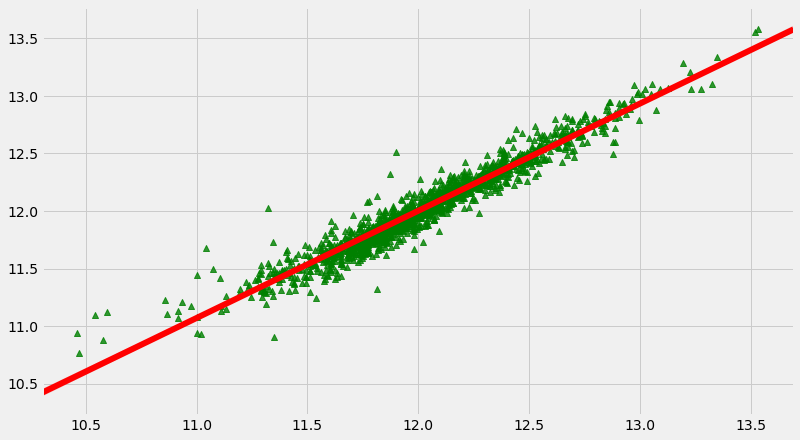

In [43]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.regplot(y_lasso, y_hat_train_lasso,color='g',marker='^',line_kws={"color":'r'})

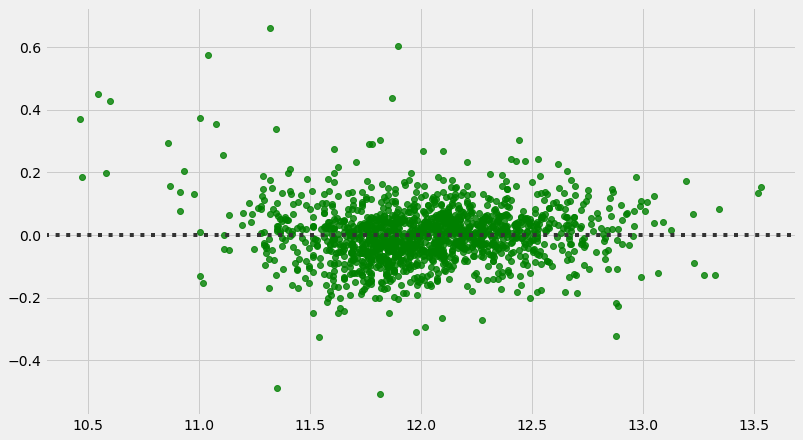

In [44]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.residplot(y_lasso, y_hat_train_lasso,color='g')

In [123]:
#test_df['SalePrice'] = np.exp(sc_y_lasso.inverse_transform(y_hat_test_lasso))
test_df['SalePrice'] = np.expm1(y_hat_test_lasso)
test_df['SalePrice'].head()

Id
1461    120894.073617
1462    146129.499232
1463    178672.512374
1464    202091.572226
1465    185898.787728
Name: SalePrice, dtype: float64

In [104]:
model_lasso.score(X_test_lasso, y_hat_test_lasso)

0.997843330918258

In [34]:
submissions = test_df['SalePrice']
submissions.columns = ['Id','SalePrice']

In [35]:
submissions.to_csv("submission_lasso.csv", header=True, index=True)

# Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_dt = DecisionTreeRegressor(random_state=42)

In [ ]:
model_dt.fit(X, y)

In [ ]:
y_hat_dt = model_dt.predict(test_df[predictors].values)

In [ ]:
y_hat_dt_train =  model_dt.predict(train_df[predictors].values)

In [ ]:
y_hat_dt[660], y_hat_dt[133], y_hat_dt[1444] 

In [ ]:
test_df['SalePrice'] = np.exp(y_hat_dt)

In [ ]:
test_df['SalePrice'].head()

In [ ]:
submissions1 = test_df['SalePrice']
submissions1.columns = ['Id','SalePrice']

In [ ]:
submissions1.to_csv("submission_dt.csv", header=True, index=True)

In [ ]:
submissions1.head()

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
ax2 = sns.distplot(y,color='b',hist=True,label='Actual')
sns.distplot(y_hat_dt_train,color='r',label='Predicted',hist=True,ax=ax2)
plt.legend()

In [ ]:
# Print residual errors
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_dt_train - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat_dt_train - y) ** 2))
print("(RMSE): %.5f" % np.sqrt(np.mean((y_hat_rf_train - y) ** 2)))
print("R2-score: %.2f" % r2_score(y_hat_dt_train , y))
print("Model Accuracy: %.2f" % model_dt.score(X , y))

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.regplot(y, y_hat_dt_train,color='g',marker='^',line_kws={"color":'r'})

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.residplot(y, y_hat_dt_train,color='g')

# Random Forest

In [8]:
X_train_rf = train_df[predictors].values
y_rf = train_df[target].values
from sklearn.ensemble import RandomForestRegressor

In [9]:
X_train_rf = train_df[predictors].values
y_rf = train_df[target].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
##from sklearn.preprocessing import scale
#sc_X_rf = StandardScaler()
#sc_y_rf = StandardScaler()

#X_train_rf = sc_X_rf.fit_transform(X_train_rf)
#y_rf = sc_y_rf.fit_transform(y_rf)

In [10]:
model_rf = RandomForestRegressor(n_jobs=-1)

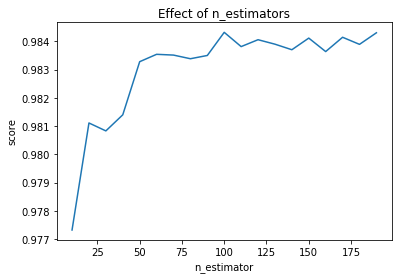

In [11]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model_rf.set_params(n_estimators=n)
    model_rf.fit(X_train_rf, y_rf)
    scores.append(model_rf.score(X_train_rf, y_rf))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [12]:
#model_rf = RandomForestRegressor(n_estimators=50)
model_rf = RandomForestRegressor()
model_rf.fit(X_train_rf, y_rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
X_test_rf=test_df[predictors].values

In [14]:
# Feature Scaling
#X_test_rf = sc_X_rf.transform(X_test_rf)

In [15]:
y_hat_test_rf = model_rf.predict(X_test_rf)
y_hat_train_rf = model_rf.predict(X_train_rf)
#y_hat_lasso

In [18]:
# Print residual errors
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_train_rf - y_rf)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat_train_rf - y_rf) ** 2))
print("(RMSE): %.5f" % np.sqrt(np.mean((y_hat_train_rf - y_rf) ** 2)))
#print("R2-score: %.2f" % r2_score(y_hat_train_rf , y_rf))#
print("Model Accuracy: %.2f" % model_rf.score(X_train_rf , y_rf))

Mean absolute error: 0.44
Residual sum of squares (MSE): 0.31
(RMSE): 0.55440
Model Accuracy: 0.98


In [19]:
#test_df['SalePrice'] = sc_y_rf.inverse_transform(y_hat_test_rf)
test_df['SalePrice'] =np.expm1(y_hat_test_rf)

In [20]:
test_df['SalePrice'].head()

Id
1461    123779.332474
1462    151748.282829
1463    160101.817320
1464    182781.831557
1465    194420.764575
Name: SalePrice, dtype: float64

In [21]:
submissions1 = test_df['SalePrice']
submissions1.columns = ['Id','SalePrice']

In [22]:
submissions1.to_csv("submission_rf.csv", header=True, index=True)

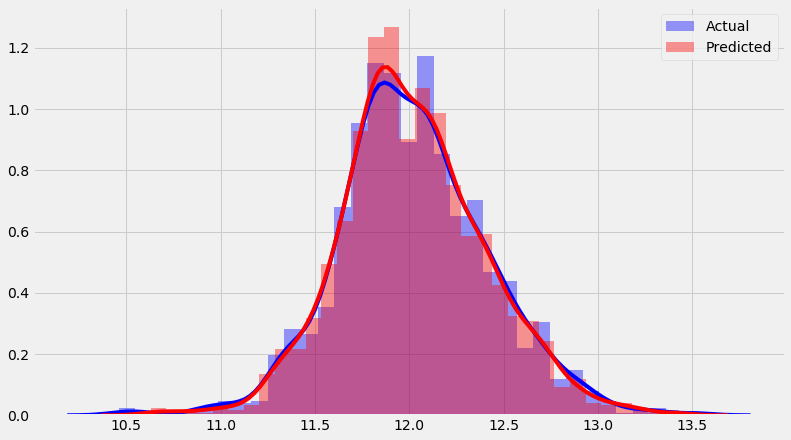

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
ax2 = sns.distplot(y_rf,color='b',hist=True,label='Actual')
sns.distplot(y_hat_train_rf,color='r',label='Predicted',hist=True,ax=ax2)
plt.legend()

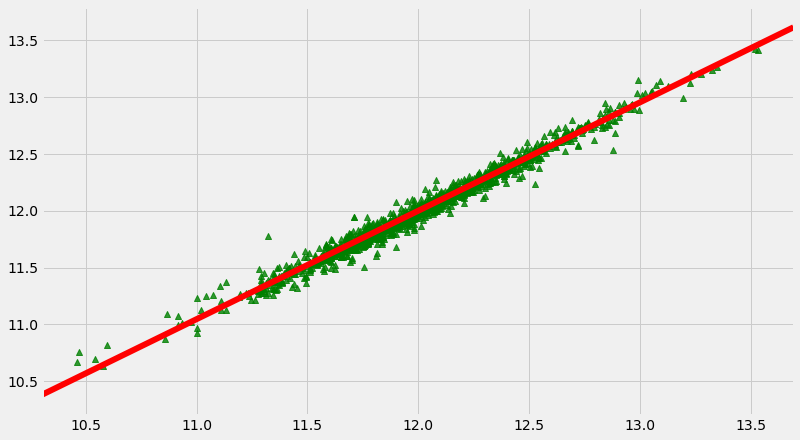

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.regplot(y_rf, y_hat_train_rf,color='g',marker='^',line_kws={"color":'r'})

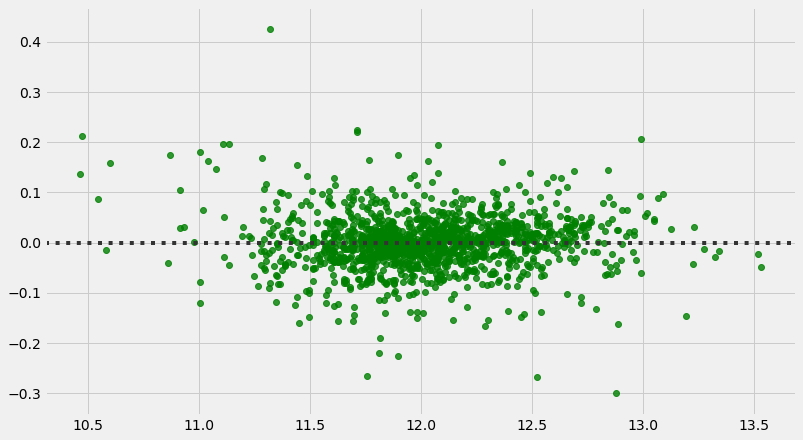

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.residplot(y_rf, y_hat_train_rf,color='g')

# Hyper Parameter Tuning  using GridSearch CV

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [8]:
X_train_lasso = train_df[predictors].values
y_lasso = train_df[target].values


alphas = np.array([100000, 10000, 1000, 100, 1,0.1,0.01,0.001,0.005,0.0001, 0.00001, 0.000001])
#[1, 0.1, 0.001, 0.0005]
model = Lasso()
grid = GridSearchCV(estimator=model, cv=50 ,param_grid=dict(alpha=alphas))
grid.fit(X_train_lasso, y_lasso)

print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.9146536661624436
0.001
{'alpha': 0.001}


In [21]:
regressor = Lasso(alpha = grid.best_estimator_.alpha)
regressor.fit(X_train_lasso, y_lasso)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
regressor.coef_.size

304

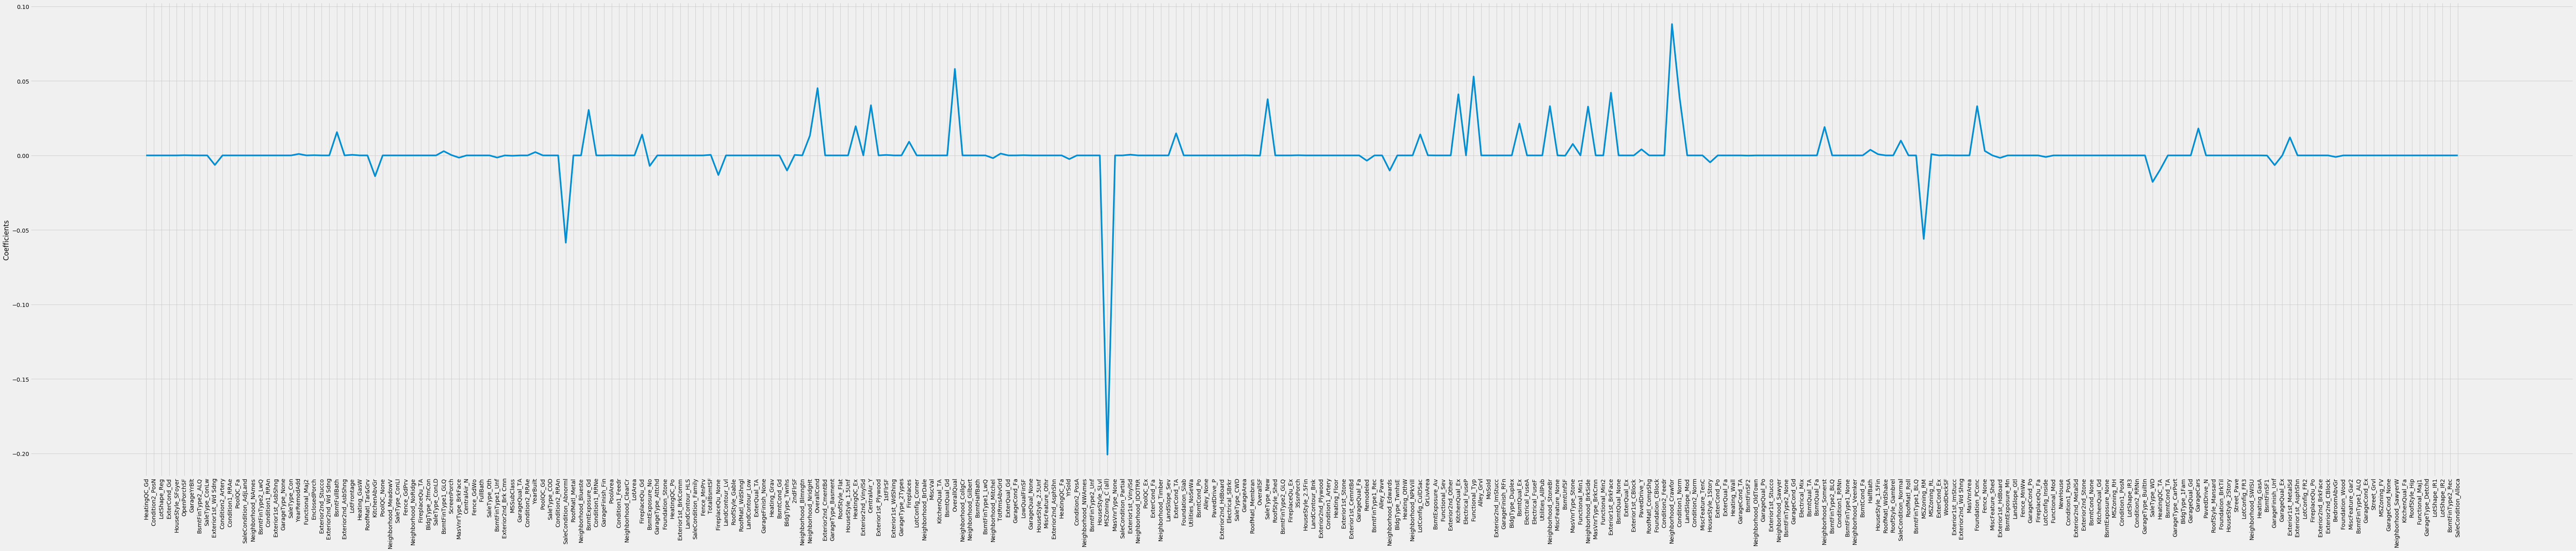

In [23]:
plt.figure(figsize=(100,20))
_ = plt.plot(range(len(predictors)), regressor.coef_)
_ = plt.xticks(range(len(predictors)), predictors, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show()

Lasso picked 79 variables and eliminated the other 225 variables


Text(0.5,1,'Coefficients in the Lasso Model')

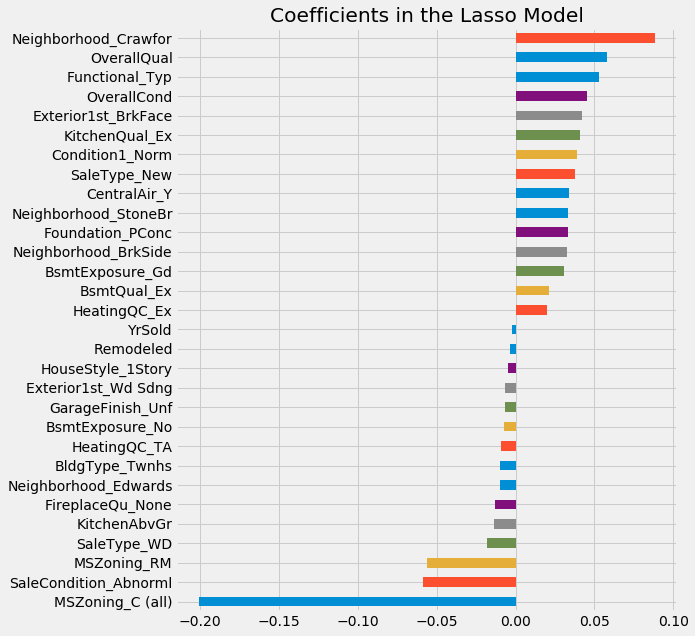

In [24]:
coef = pd.Series(regressor.coef_, index = predictors)
print("Lasso picked "+ str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(15),
 coef.sort_values().tail(15)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [25]:
X_test_lasso =test_df[predictors].values

In [26]:
y_hat_test_GridCV = regressor.predict(X_test_lasso)
y_hat_train_GridCV = regressor.predict(X_train_lasso)
#y_hat_lasso

In [27]:
# Print residual errors
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_train_GridCV - y_lasso)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat_train_GridCV - y_lasso) ** 2))
print("(RMSE): %.5f" % np.sqrt(np.mean((y_hat_train_GridCV - y_lasso) ** 2)))
print("R2-score: %.2f" % r2_score(y_hat_train_GridCV , y_lasso))#
print("Model Accuracy: %.2f" % regressor.score(X_train_lasso , y_lasso))

Mean absolute error: 0.44
Residual sum of squares (MSE): 0.31
(RMSE): 0.55250


NameError: name 'r2_score' is not defined

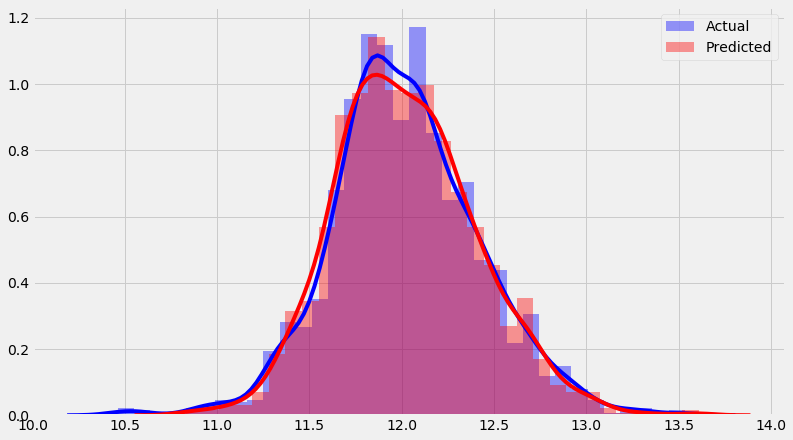

In [28]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
ax2 = sns.distplot(y_lasso,color='b',hist=True,label='Actual')
sns.distplot(y_hat_train_GridCV,color='r',label='Predicted',hist=True,ax=ax2)
plt.legend()

In [29]:
test_df['SalePrice'] = np.expm1(y_hat_test_GridCV)
test_df['SalePrice'].head()

Id
1461    120894.073617
1462    146129.499232
1463    178672.512374
1464    202091.572226
1465    185898.787728
Name: SalePrice, dtype: float64

In [30]:
regressor.score(X_test_lasso, y_hat_test_GridCV)

1.0

In [31]:
regressor.score(X_train_lasso , y_lasso)

0.9315259412746933

In [32]:
submissions1 = test_df['SalePrice']
submissions1.columns = ['Id','SalePrice']
submissions1.to_csv("submission_GRID.csv", header=True, index=True)